# Customer Churn Prediction - Complete ML Pipeline

## Project Overview
This notebook implements a complete machine learning pipeline to predict customer churn based on behavioral and demographic data.

**Pipeline Steps**:
1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Feature Engineering
4. Model Training (Baseline + Advanced)
5. Model Evaluation & Comparison

## 1. Setup and Imports

In [137]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore Data

In [138]:
"""
First upload the dataset in `/content` directory to load and continue with downstream tasks.
"""
# Load dataset
df = pd.read_csv('/content/dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (1000, 15)

First 5 rows:


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [139]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Res

In [140]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.50000,288.819436,1.00,250.7500,500.500,750.2500,1000.00
Age,1000.0,43.26700,15.242311,18.00,30.0000,43.000,56.0000,69.00
Annual_Income,1000.0,111.96296,52.844111,20.01,67.8000,114.140,158.4525,199.73
Total_Spend,1000.0,5080.79265,2862.123350,108.94,2678.6750,4986.195,7606.4700,9999.64
Years_as_Customer,1000.0,9.72700,5.536346,1.00,5.0000,9.000,14.0000,19.00
Num_of_Purchases,1000.0,49.45600,28.543595,1.00,25.0000,49.000,74.0000,99.00
Average_Transaction_Amount,1000.0,266.87653,145.873445,10.46,139.6825,270.100,401.6025,499.57
Num_of_Returns,1000.0,4.61200,2.896869,0.00,2.0000,5.000,7.0000,9.00
Num_of_Support_Contacts,1000.0,1.93400,1.402716,0.00,1.0000,2.000,3.0000,4.00
Satisfaction_Score,1000.0,2.97400,1.391855,1.00,2.0000,3.000,4.0000,5.00


In [141]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")

Missing Values:
No missing values!


In [142]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### 2.1 Observation
- Dataset contains total 1000 samples and 15 features. `Customer_ID` as an irrelevant feature and will be removed later.
- There is no missing, duplicates or null value in the dataset.
- Numerical features have diverse range in there values, must need scaling.
- Target variable is "Target_Churn", which datatype is `bool`. Need to perform `Label Encoding`.
- `Gender` & `Promotion_Response` are categorical features, which also need encoding (binary or one-hot).

## 3. Exploratory Data Analysis (EDA)

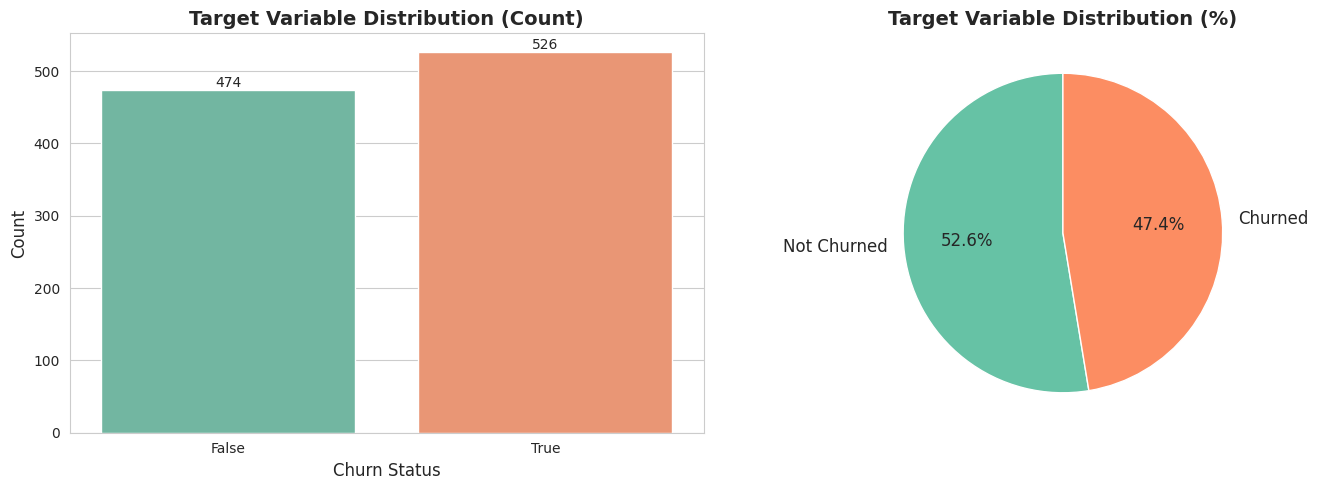


Churn Rate: 52.60%


In [7]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df['Target_Churn'].value_counts()
sns.countplot(data=df, x='Target_Churn', ax=axes[0], palette='Set2')
axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Pie chart
colors = sns.color_palette('Set2', 2)
axes[1].pie(target_counts.values, labels=['Not Churned', 'Churned'], autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Target Variable Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nChurn Rate: {(target_counts[True]/len(df)*100):.2f}%")

### 3.1 Observations
- Target variable `Target_Churn`'s distribution is quite balanced. Churn rate is `52.6%` and Not churn rate is `47.4%`. Therefore, here is no imbalance issue.

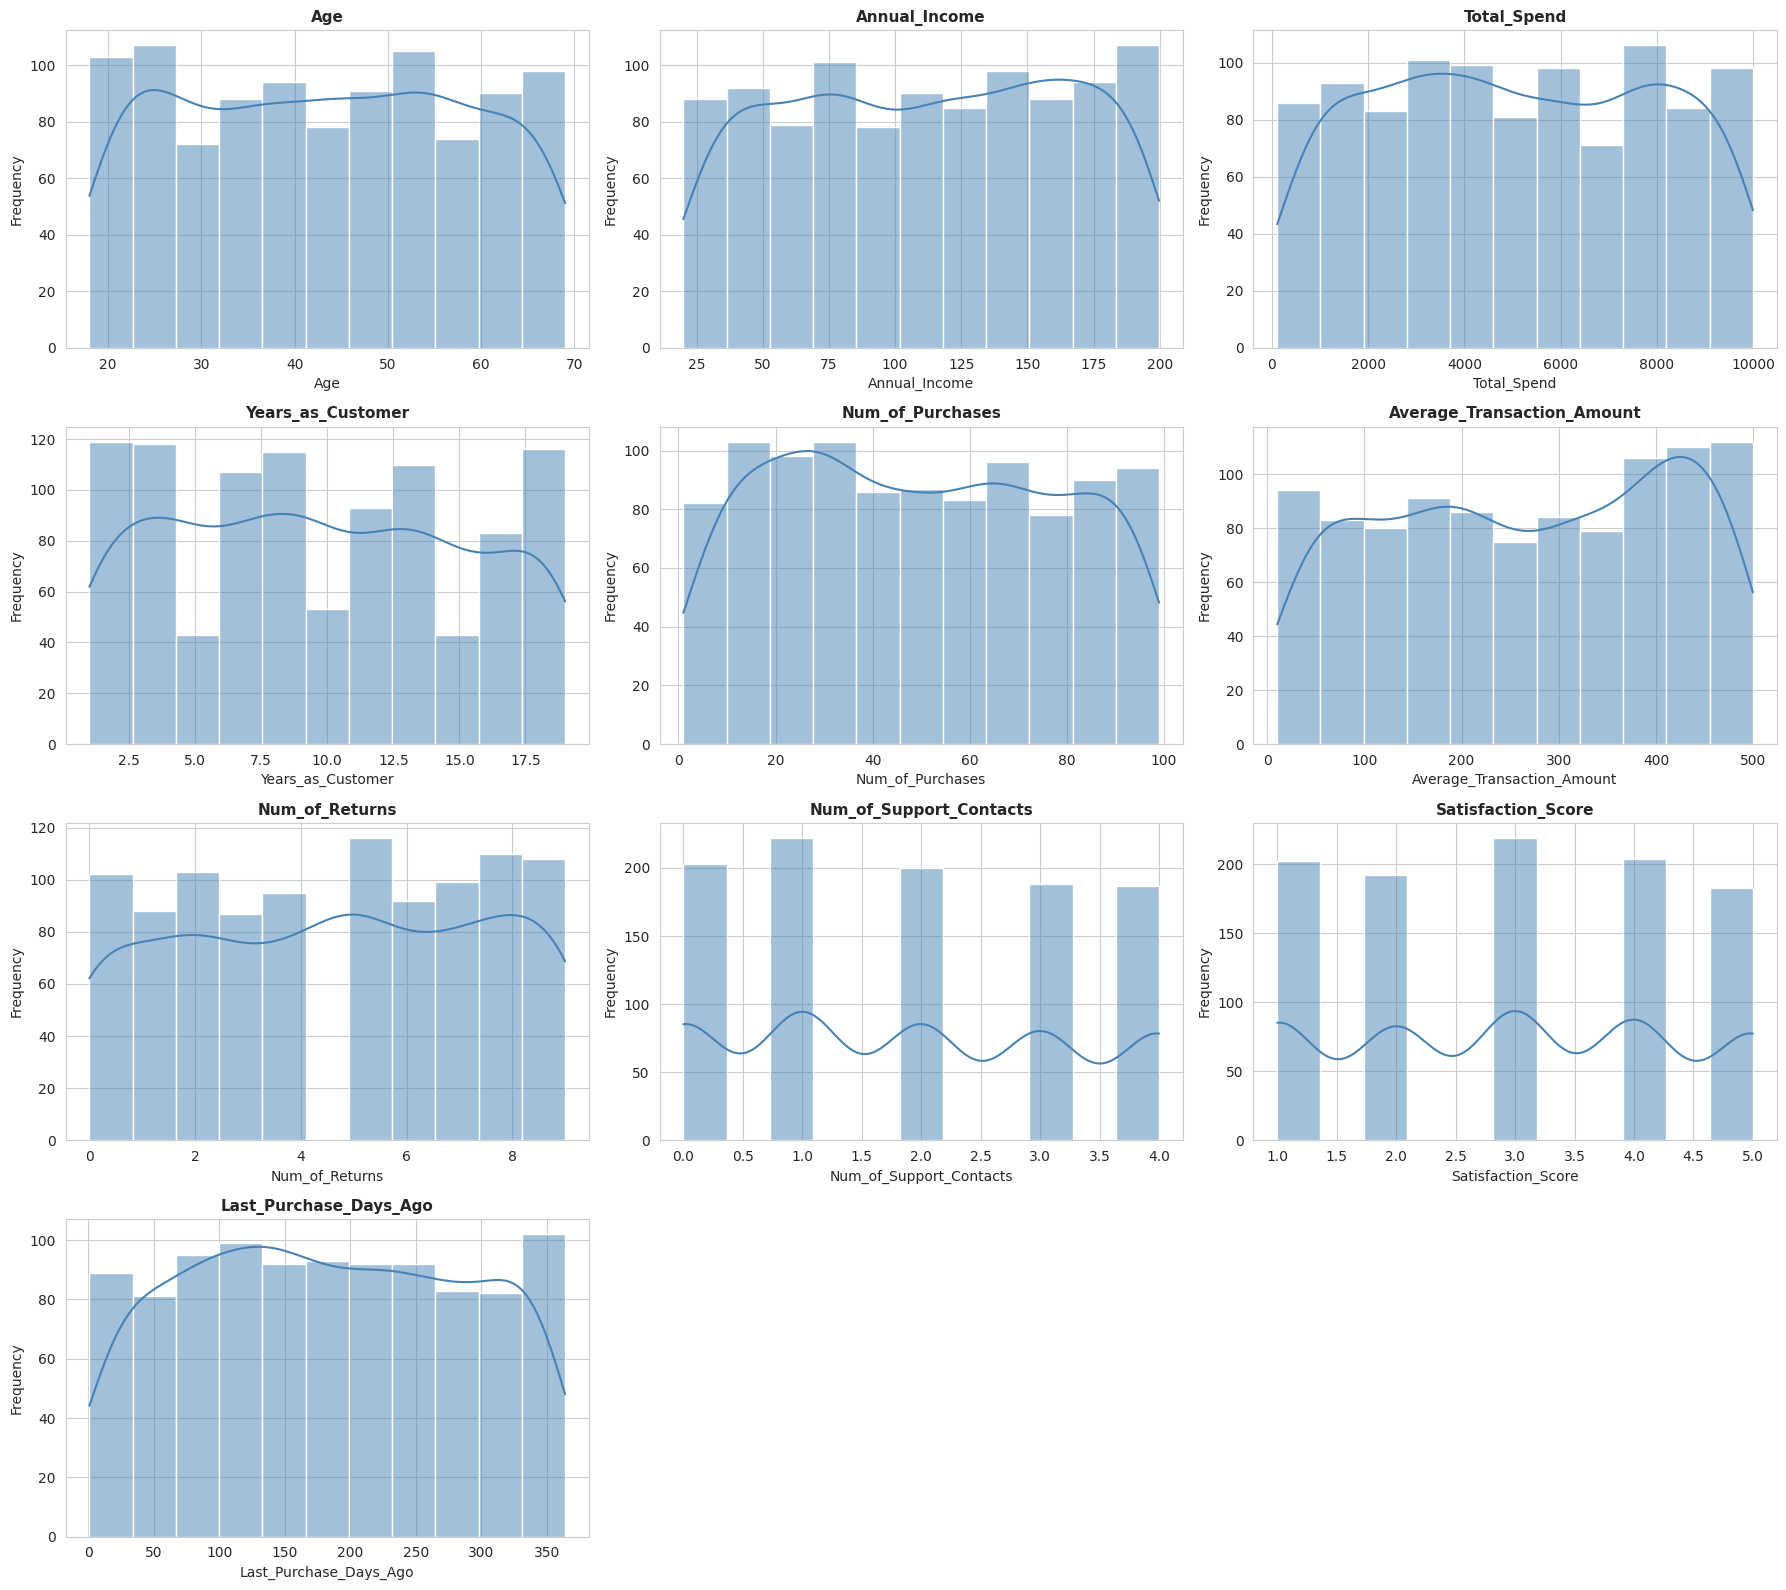

In [8]:
# Numerical features distribution
numerical_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                  'Num_of_Purchases', 'Average_Transaction_Amount',
                  'Num_of_Returns', 'Num_of_Support_Contacts',
                  'Satisfaction_Score', 'Last_Purchase_Days_Ago']

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

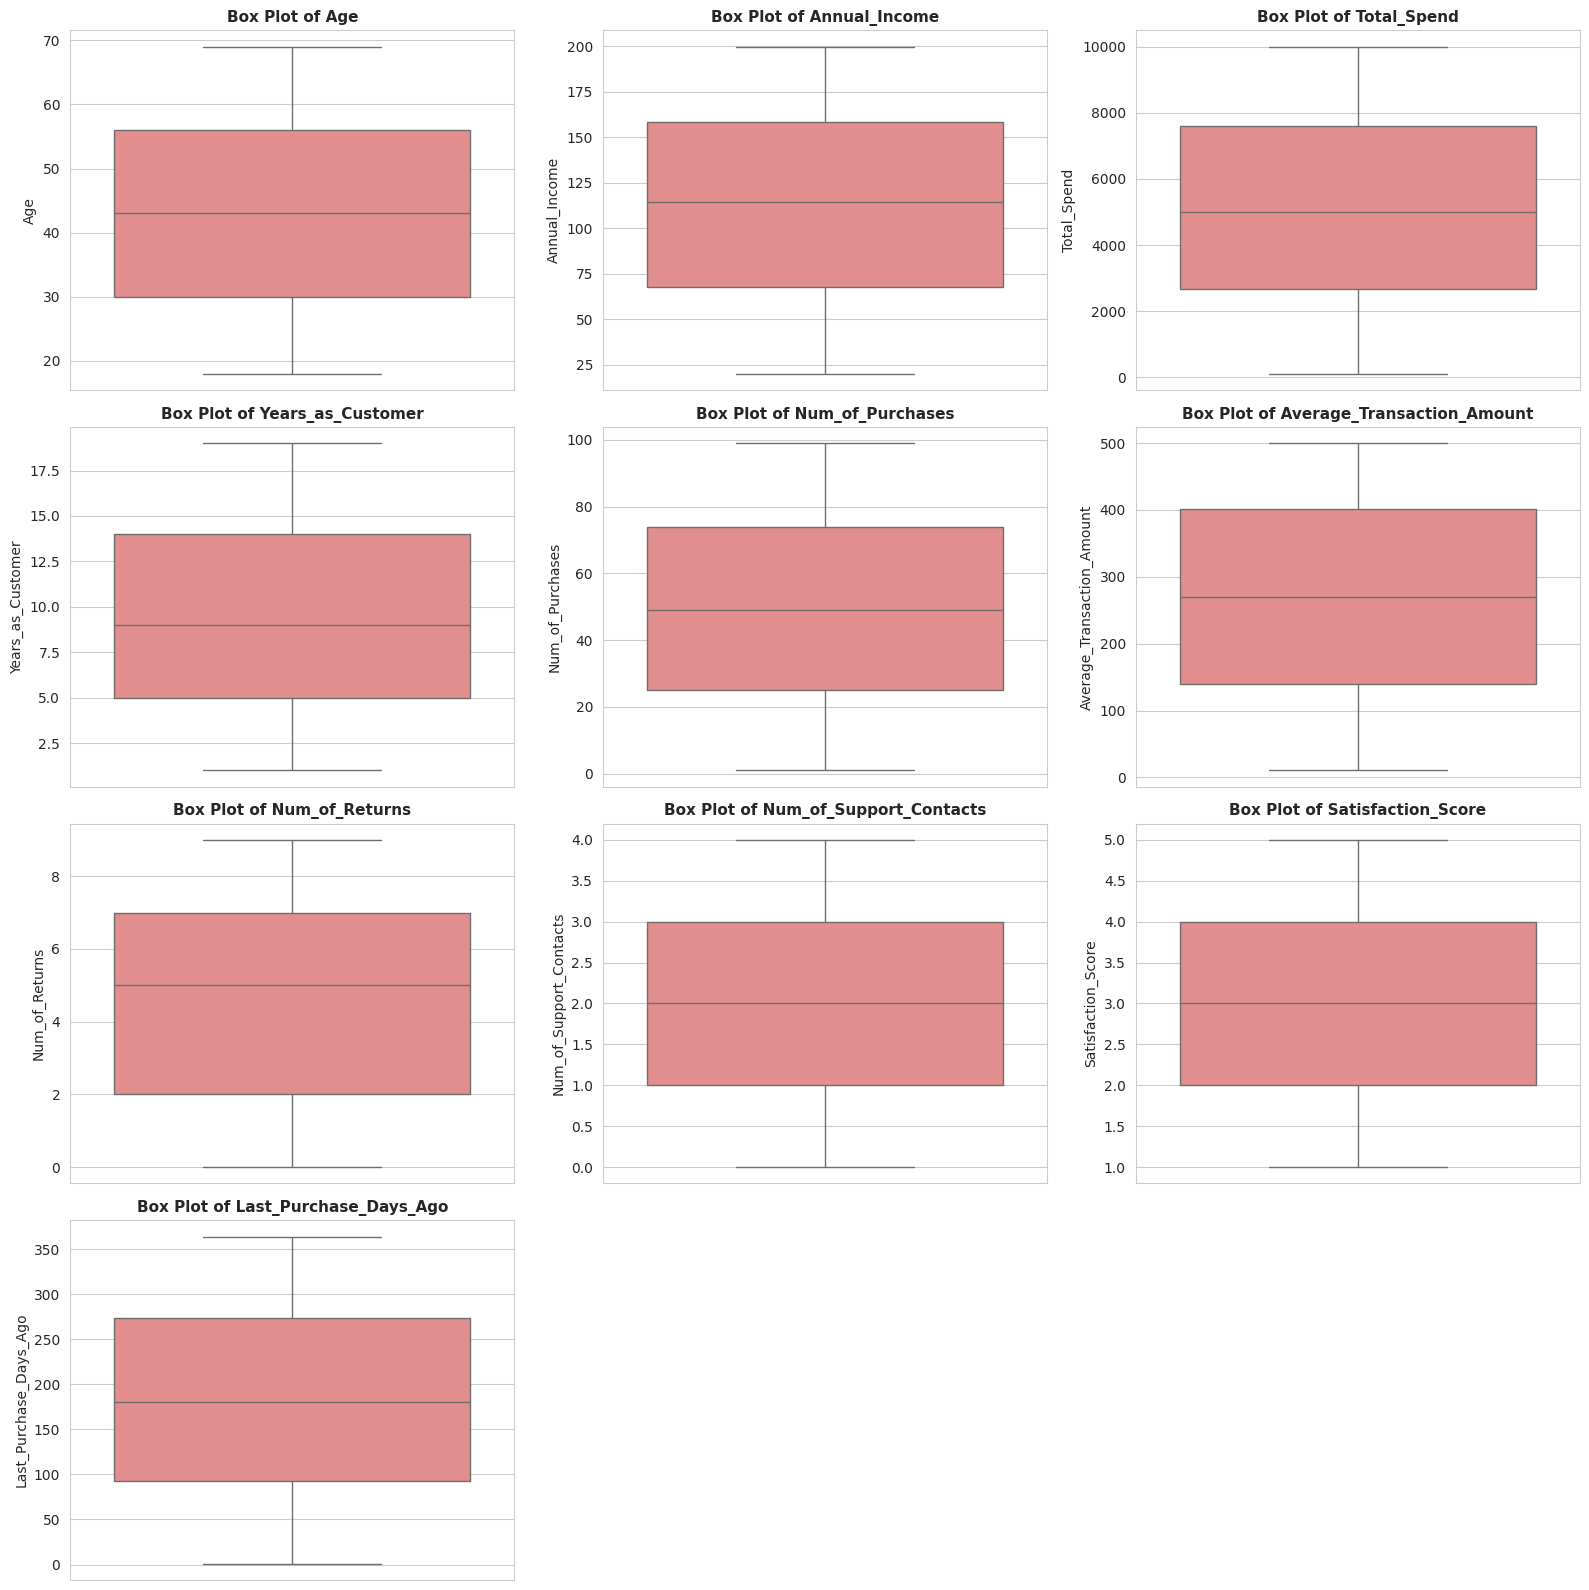

In [144]:
# Box plots for outlier detection
numerical_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                  'Num_of_Purchases', 'Average_Transaction_Amount',
                  'Num_of_Returns', 'Num_of_Support_Contacts',
                  'Satisfaction_Score', 'Last_Purchase_Days_Ago']

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Box Plot of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### 3.2 Observations
- After analysing the numerical features distribution (without scaling), most of them show almost uniform distribution. Though `Num_of_Support_Contacts` & `Satisfaction_Score` contain some variety, which is predictable because of there discrete nature.
- Box plot of all numerical features shows no outliers in the dataset. We don't need to perform any outlier detection in preprocessing.

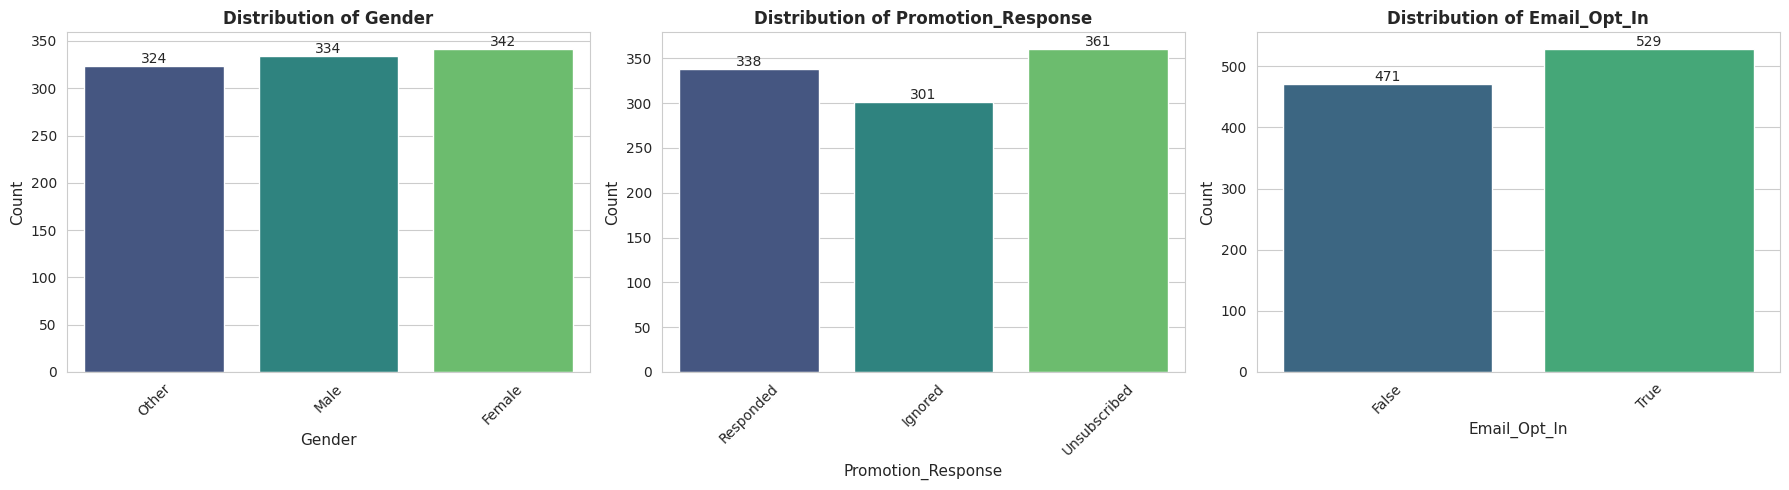

In [10]:
# Categorical distributions
categorical_cols = ['Gender', 'Promotion_Response', 'Email_Opt_In']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].tick_params(axis='x', rotation=45)

    # Add value labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

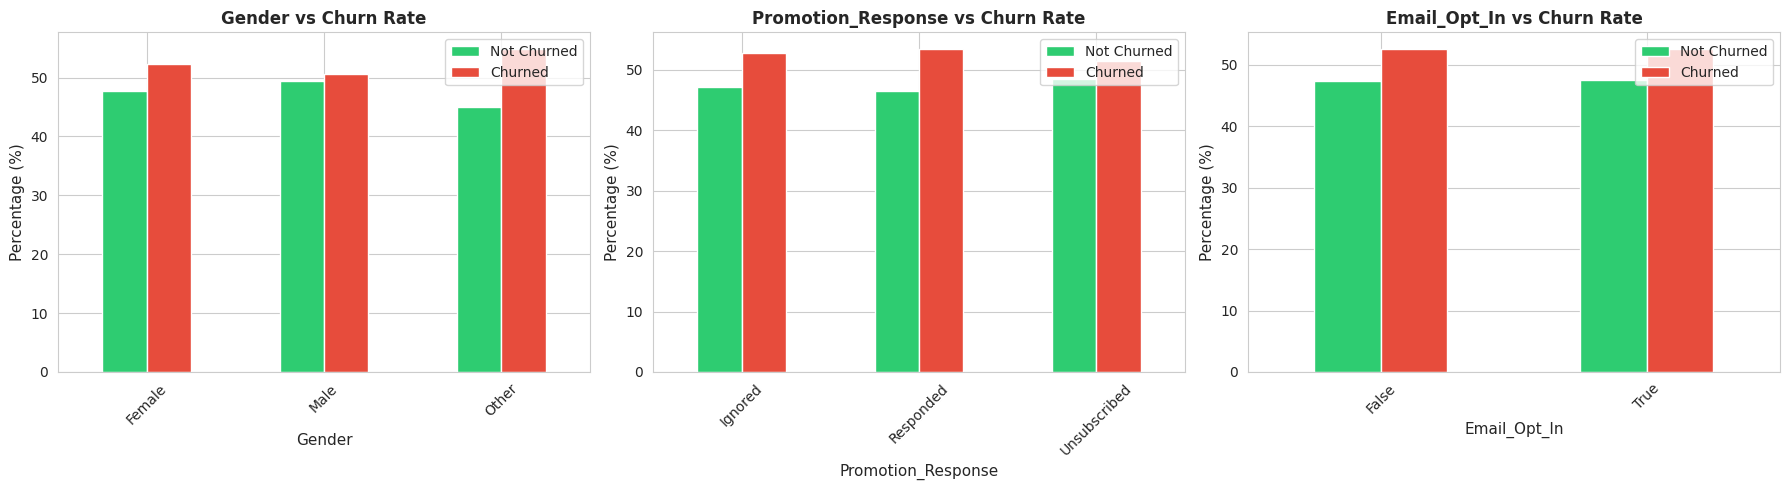

In [14]:
# Categorical features vs Target
categorical_cols = ['Gender', 'Promotion_Response', 'Email_Opt_In']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[col], df['Target_Churn'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], stacked=False, color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn Rate', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Percentage (%)', fontsize=11)
    axes[idx].legend(['Not Churned', 'Churned'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.3 Observations
- Categorical features particularly `Gender` & `Promotion_Response` contain different unique classes and there is no ordinality between them. One hot encoding will be good candidate to encode these two features.
- As `Email_Opt_In` is bool type feature, we can use binary encoding here.
- No feature shows significant pattern or trend with the target variable `Target_Churn`.

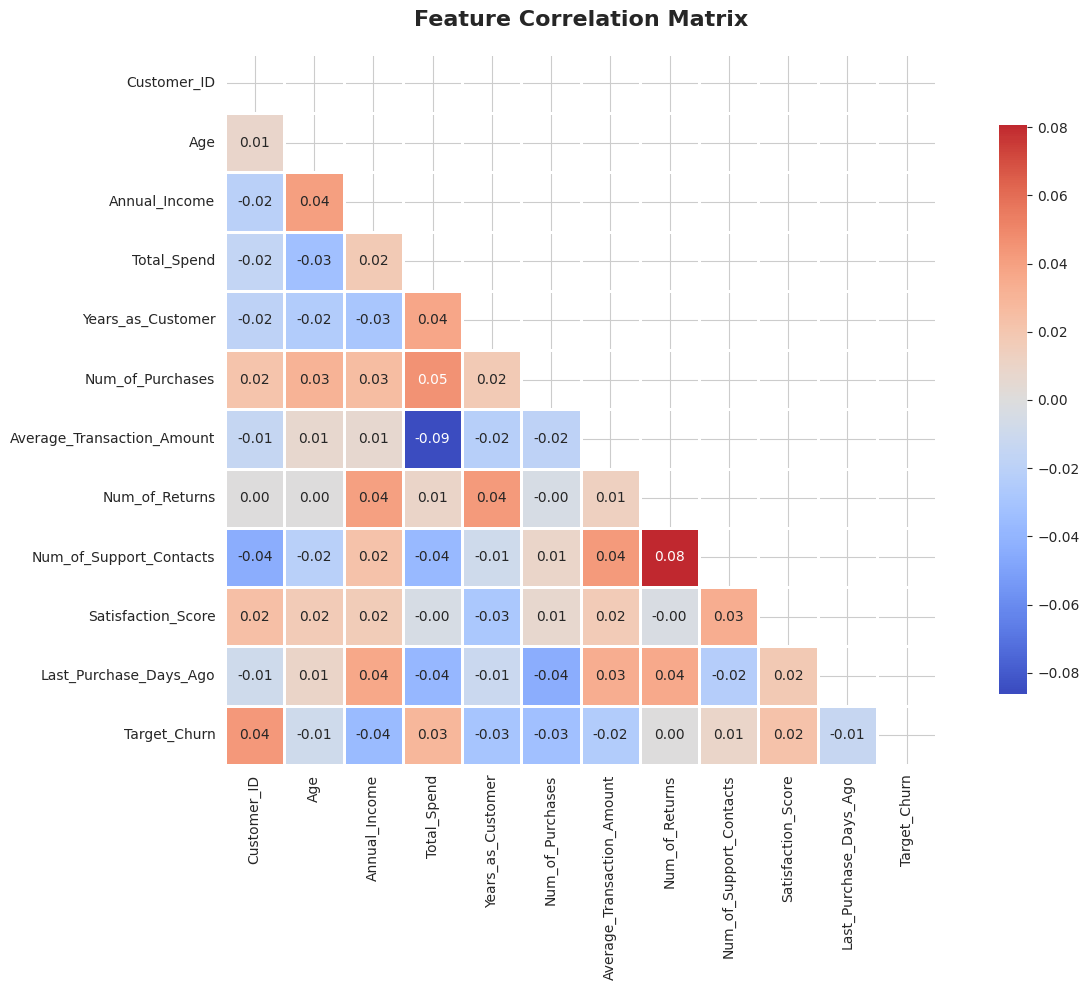

In [11]:
# Correlation analysis
df_corr = df.copy()
df_corr['Target_Churn'] = df_corr['Target_Churn'].astype(int)
numerical_cols_with_target = df_corr.select_dtypes(include=[np.number]).columns.tolist()

corr_matrix = df_corr[numerical_cols_with_target].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

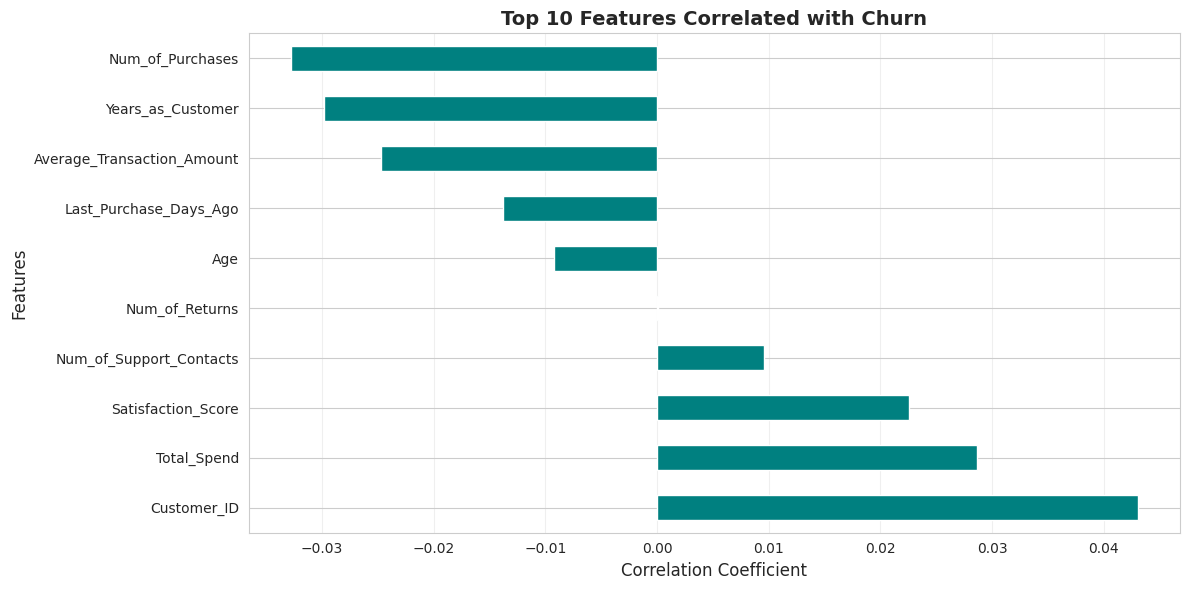

In [12]:
# Correlation with target
target_corr = corr_matrix['Target_Churn'].sort_values(ascending=False)

# Top correlated features with target
top_features = target_corr[1:11]  # Exclude target itself
plt.figure(figsize=(12, 6))
top_features.plot(kind='barh', color='teal')
plt.title('Top 10 Features Correlated with Churn', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.4 Observations
- Most of the input features show very weak correlation with target variable.
- Surprisingly `Customer_ID` shows highest feature importance with target variable.
- Top three important features are `Num_of_Support_Contacts`, `Satisfaction_Score` & `Total_Spend`. Need to perform feature engineering to get better features.

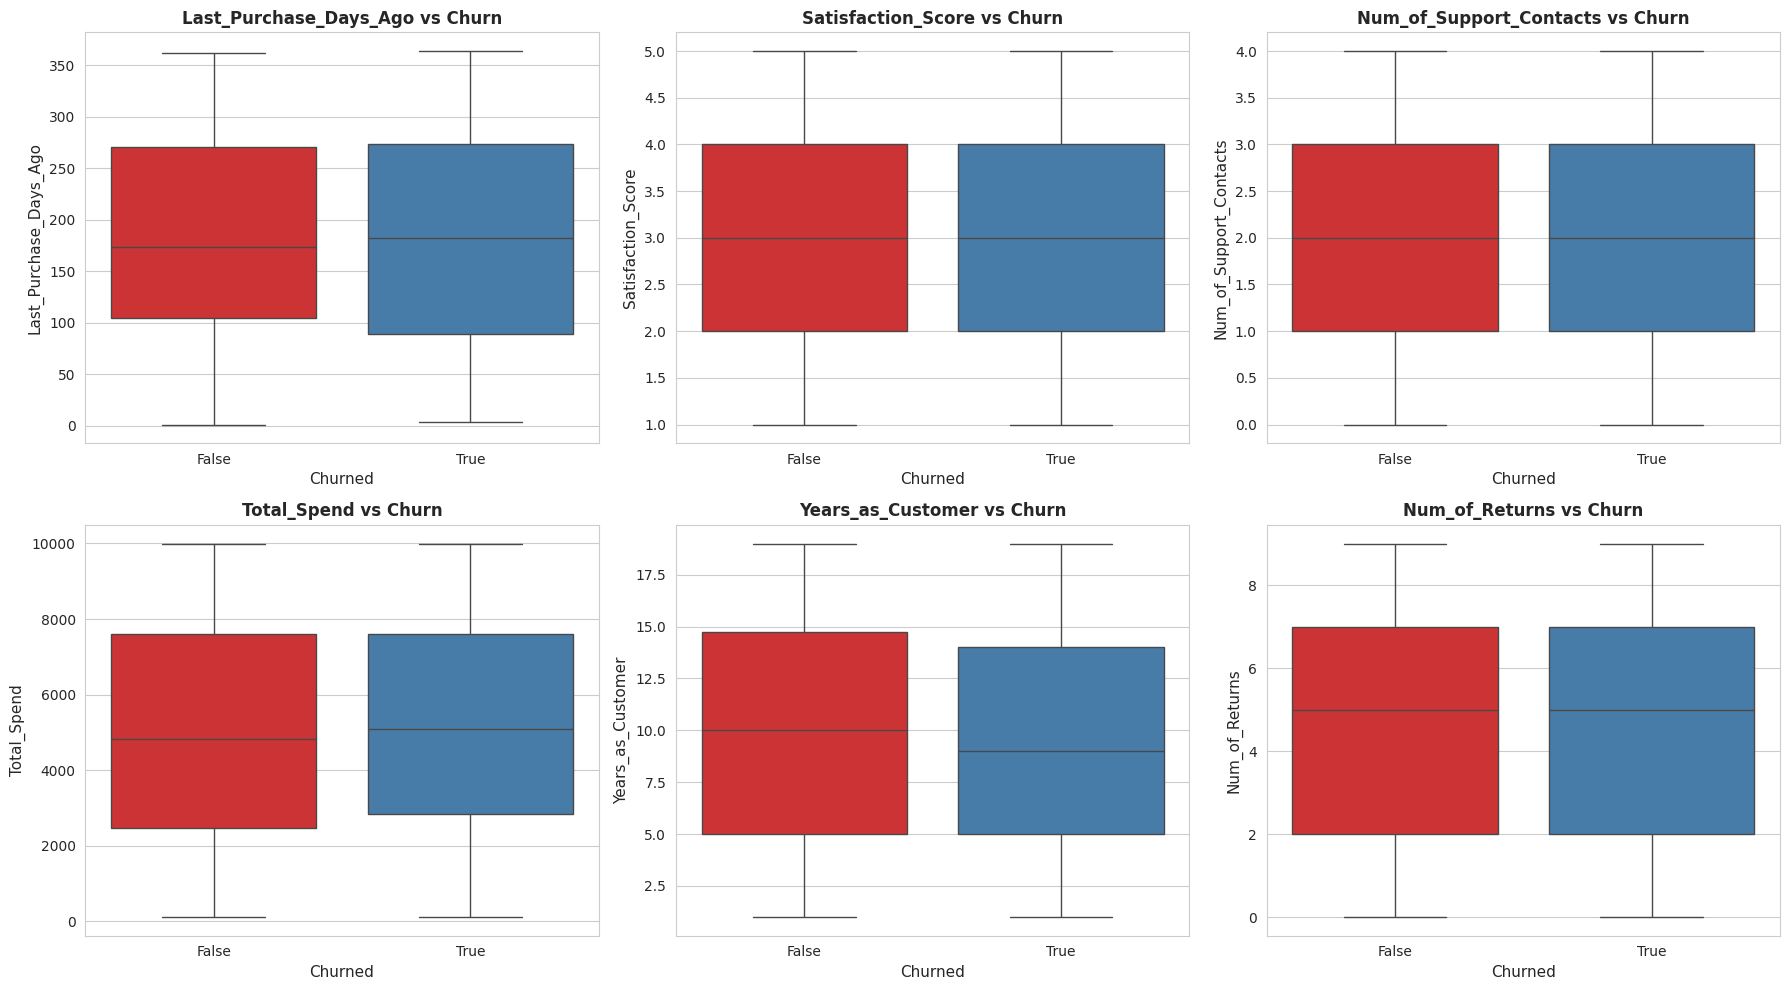

In [13]:
# Bivariate Analysis - Numerical features vs Target
# Key features for visualization
key_features = ['Last_Purchase_Days_Ago', 'Satisfaction_Score', 'Num_of_Support_Contacts',
                'Total_Spend', 'Years_as_Customer', 'Num_of_Returns']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    sns.boxplot(data=df, x='Target_Churn', y=col, ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churned', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [15]:
# Drop unnecessary columns
df_processed = df.drop('Customer_ID', axis=1)
print(f"Dropped Customer_ID column")
print(f"Remaining columns: {df_processed.shape[1]}")

Dropped Customer_ID column
Remaining columns: 14


In [16]:
# Encode categorical features
print("Encoding categorical features...\n")

# One-Hot Encoding for Gender
print("1. Gender: One-Hot Encoding (no ordinal relationship)")
gender_dummies = pd.get_dummies(df_processed['Gender'], prefix='Gender', drop_first=False)
df_processed = pd.concat([df_processed, gender_dummies], axis=1)
df_processed = df_processed.drop('Gender', axis=1)
print(f"   Created: {gender_dummies.columns.tolist()}")

# One-Hot Encoding for Promotion_Response
print("\n2. Promotion_Response: One-Hot Encoding (no ordinal relationship)")
promo_dummies = pd.get_dummies(df_processed['Promotion_Response'], prefix='Promo', drop_first=False)
df_processed = pd.concat([df_processed, promo_dummies], axis=1)
df_processed = df_processed.drop('Promotion_Response', axis=1)
print(f"   Created: {promo_dummies.columns.tolist()}")

# Binary encoding
print("\n3. Email_Opt_In and Target_Churn: Binary (0/1)")
df_processed['Email_Opt_In'] = df_processed['Email_Opt_In'].astype(int)
df_processed['Target_Churn'] = df_processed['Target_Churn'].astype(int)

print(f"\nEncoding completed! New shape: {df_processed.shape}")

Encoding categorical features...

1. Gender: One-Hot Encoding (no ordinal relationship)
   Created: ['Gender_Female', 'Gender_Male', 'Gender_Other']

2. Promotion_Response: One-Hot Encoding (no ordinal relationship)
   Created: ['Promo_Ignored', 'Promo_Responded', 'Promo_Unsubscribed']

3. Email_Opt_In and Target_Churn: Binary (0/1)

Encoding completed! New shape: (1000, 18)


In [17]:
# Split features and target
X = df_processed.drop('Target_Churn', axis=1)
y = df_processed['Target_Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1000, 17)
Target shape: (1000,)


In [19]:
# Train-validation-test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"Training set:   {X_train.shape[0]} samples (70%)")
print(f"Validation set: {X_val.shape[0]} samples (15%)")
print(f"Test set:       {X_test.shape[0]} samples (15%)")

Training set:   700 samples (70%)
Validation set: 150 samples (15%)
Test set:       150 samples (15%)


In [20]:
# Scale numerical features
encoded_cols = gender_dummies.columns.tolist() + promo_dummies.columns.tolist()
numerical_cols = [col for col in X.columns if col not in encoded_cols]

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"Scaled {len(numerical_cols)} numerical features")

Scaled 11 numerical features


## 5. Feature Engineering

In [21]:
# Create interaction features
print("Creating engineered features...\n")

for df_set in [X_train, X_val, X_test]:
    df_set['Spend_per_Purchase'] = df_set['Total_Spend'] / (df_set['Num_of_Purchases'] + 1)
    df_set['Return_Rate'] = df_set['Num_of_Returns'] / (df_set['Num_of_Purchases'] + 1)
    df_set['Support_per_Year'] = df_set['Num_of_Support_Contacts'] / (df_set['Years_as_Customer'] + 1)
    df_set['Purchase_Frequency'] = df_set['Num_of_Purchases'] / (df_set['Years_as_Customer'] + 1)
    df_set['Income_to_Spend_Ratio'] = df_set['Total_Spend'] / (df_set['Annual_Income'] + 1)
    df_set['Recency_Score'] = 1 / (df_set['Last_Purchase_Days_Ago'] + 1)

print("Created 6 engineered features")
print(f"Total features: {X_train.shape[1]}")

Creating engineered features...

Created 6 engineered features
Total features: 23



Using ANOVA F-statistic for feature selection...


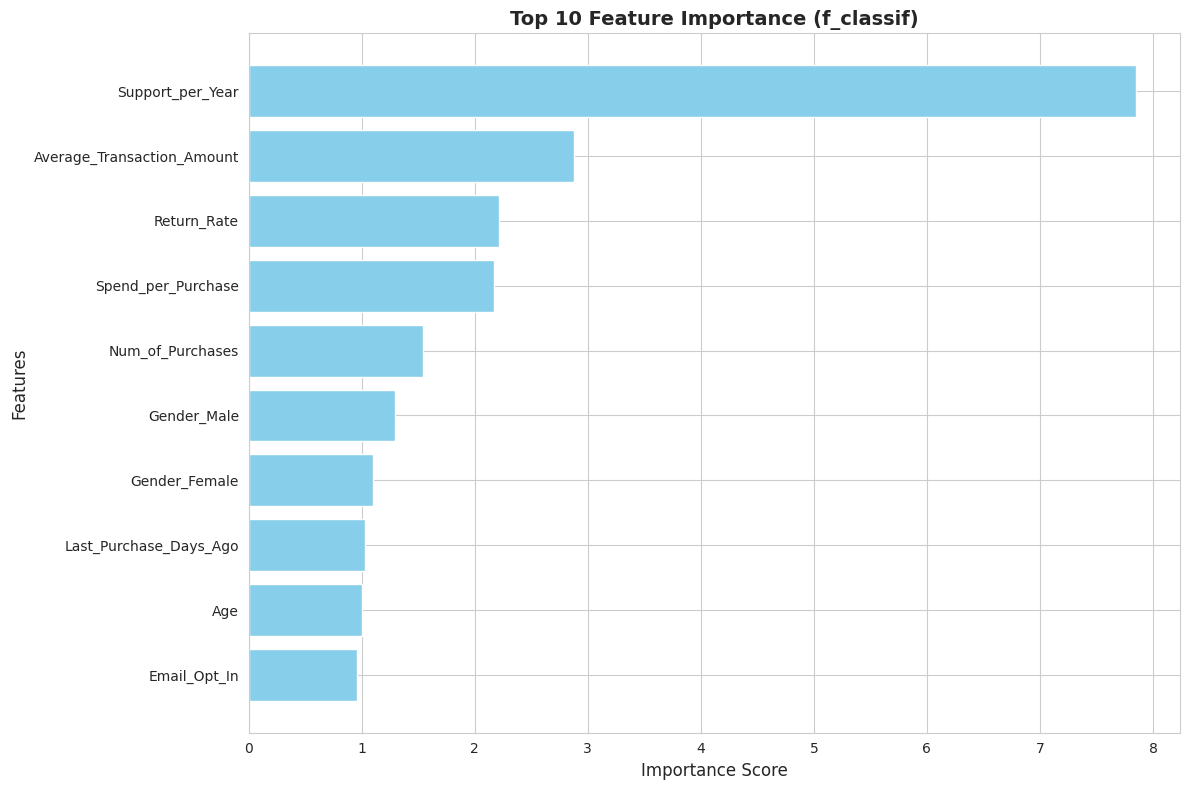

In [28]:
# Feature importance analysis
method = 'f_classif'
k = 10
if method == 'f_classif':
    print("\nUsing ANOVA F-statistic for feature selection...")
    selector = SelectKBest(score_func=f_classif, k='all')
else:
    print("\nUsing Mutual Information for feature selection...")
    selector = SelectKBest(score_func=mutual_info_classif, k='all')

selector.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_scores.head(k)
plt.barh(range(len(top_features)), top_features['Score'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(f'Top {k} Feature Importance ({method})', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Model Training

In [30]:
# Dictionary to store models and results
models = {}
results = {}

In [79]:
# 1. Logistic Regression
print("Training Logistic Regression...")
lr = LogisticRegression(max_iter=100, random_state=42)
lr.fit(X_train, y_train)
models['Logistic Regression'] = lr
results['Logistic Regression'] = {
    'train': lr.score(X_train, y_train),
    'val': lr.score(X_val, y_val)
}
print(f"Train Acc: {results['Logistic Regression']['train']:.4f}, Val Acc: {results['Logistic Regression']['val']:.4f}")

Training Logistic Regression...
Train Acc: 0.5671, Val Acc: 0.4533


In [87]:
# 2. Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=3, max_depth=5, min_samples_split=3, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
results['Random Forest'] = {
    'train': rf.score(X_train, y_train),
    'val': rf.score(X_val, y_val)
}
print(f"Train Acc: {results['Random Forest']['train']:.4f}, Val Acc: {results['Random Forest']['val']:.4f}")

Training Random Forest...
Train Acc: 0.6957, Val Acc: 0.4933


In [88]:
# 3. XGBoost
print("Training XGBoost...")
xgb = XGBClassifier(n_estimators=2, max_depth=3, learning_rate=0.2, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
models['XGBoost'] = xgb
results['XGBoost'] = {
    'train': xgb.score(X_train, y_train),
    'val': xgb.score(X_val, y_val)
}
print(f"Train Acc: {results['XGBoost']['train']:.4f}, Val Acc: {results['XGBoost']['val']:.4f}")

Training XGBoost...
Train Acc: 0.6157, Val Acc: 0.5667


In [89]:
# 4. LightGBM
print("Training LightGBM...")
lgbm = LGBMClassifier(n_estimators=2, max_depth=3, learning_rate=0.2, random_state=42, verbose=-1)
lgbm.fit(X_train, y_train)
models['LightGBM'] = lgbm
results['LightGBM'] = {
    'train': lgbm.score(X_train, y_train),
    'val': lgbm.score(X_val, y_val)
}
print(f"Train Acc: {results['LightGBM']['train']:.4f}, Val Acc: {results['LightGBM']['val']:.4f}")

Training LightGBM...
Train Acc: 0.5757, Val Acc: 0.5533


In [126]:
# 5. Artificial Neural Network (ANN)
print("Training ANN...")

# Build model
ann = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = ann.fit(X_train, y_train, validation_data=(X_val, y_val),
                  epochs=30, batch_size=16, verbose=0)

models['ANN'] = ann
train_loss, train_acc = ann.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = ann.evaluate(X_val, y_val, verbose=0)
results['ANN'] = {'train': train_acc, 'val': val_acc}
print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

Training ANN...
Train Acc: 0.6171, Val Acc: 0.4333


In [127]:
# Summary of baseline models
results_df = pd.DataFrame(results).T
results_df.columns = ['Training Accuracy', 'Validation Accuracy']
print("\nBaseline Model Results:")
results_df


Baseline Model Results:


,Training Accuracy,Validation Accuracy
Logistic Regression,0.567143,0.453333
Random Forest,0.695714,0.493333
XGBoost,0.615714,0.566667
LightGBM,0.575714,0.553333
ANN,0.617143,0.433333


## 7. Model Evaluation on Test Set

In [128]:
# Generate predictions
predictions = {}

for name, model in models.items():
    if name == 'ANN':
        y_pred_proba = model.predict(X_test, verbose=0)
        predictions[name] = {
            'y_pred': (y_pred_proba > 0.5).astype(int).flatten(),
            'y_pred_proba': y_pred_proba.flatten()
        }
    else:
        predictions[name] = {
            'y_pred': model.predict(X_test),
            'y_pred_proba': model.predict_proba(X_test)[:, 1]
        }

print("Predictions generated for all models")

Predictions generated for all models


In [129]:
# Calculate metrics
metrics = {}

for name in predictions.keys():
    y_pred = predictions[name]['y_pred']
    y_pred_proba = predictions[name]['y_pred_proba']

    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

# Create comparison DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)

print("\nTest Set Performance:")
metrics_df


Test Set Performance:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.540000,0.550000,0.696203,0.614525,0.522910
XGBoost,0.540000,0.540984,0.835443,0.656716,0.526743
Random Forest,0.533333,0.545455,0.683544,0.606742,0.564183
LightGBM,0.533333,0.533835,0.898734,0.669811,0.494384
ANN,0.513333,0.531250,0.645570,0.582857,0.519522


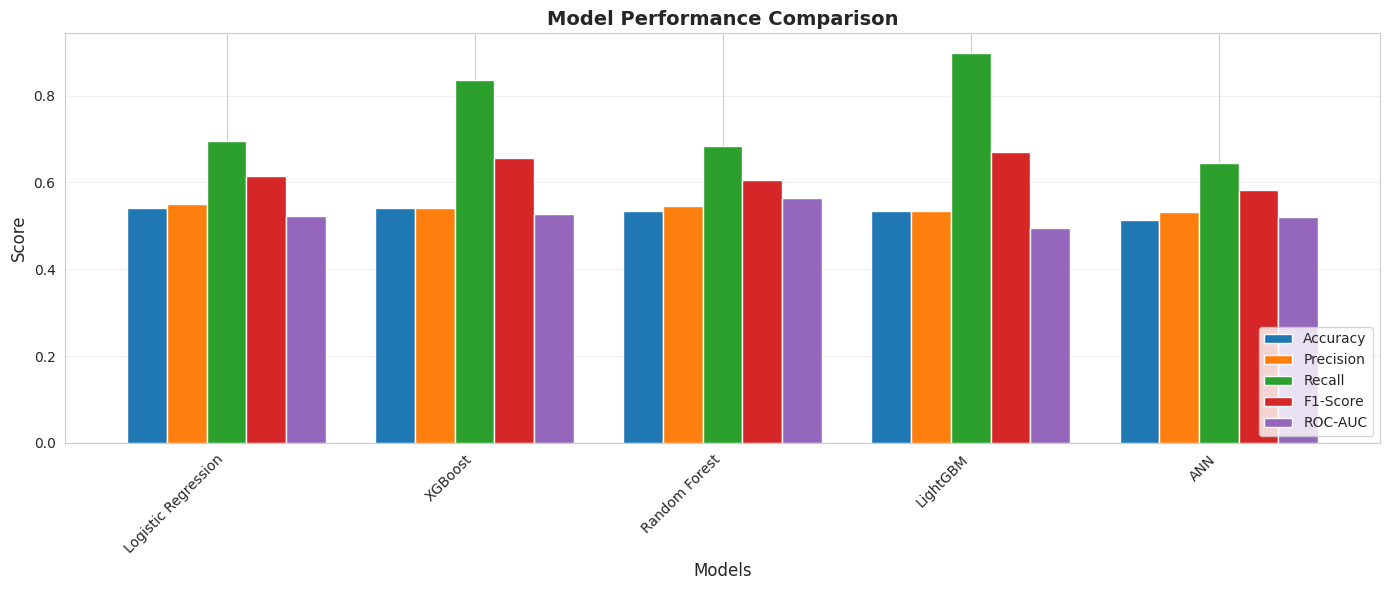

In [130]:
# Visualization: Model Comparison
fig, ax = plt.subplots(figsize=(14, 6))
metrics_df.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

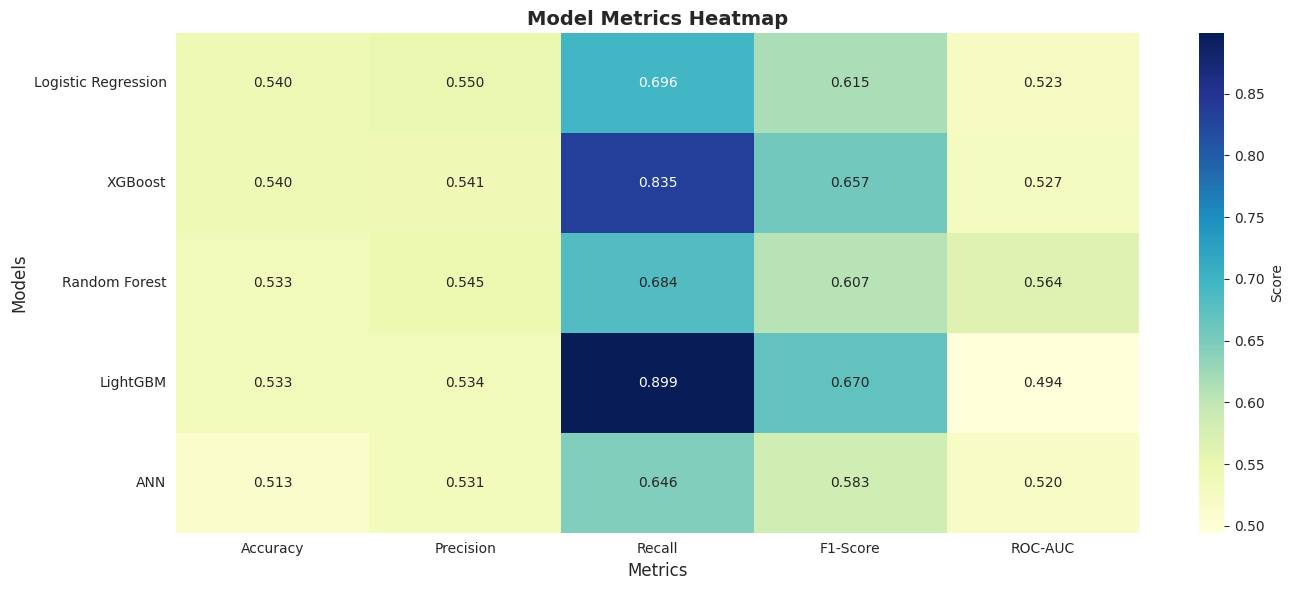

In [136]:
# Visualization: Model Comparison
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap='YlGnBu', ax=ax,
            cbar_kws={'label': 'Score'})
ax.set_title('Model Metrics Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Models', fontsize=12)
plt.tight_layout()
plt.show()

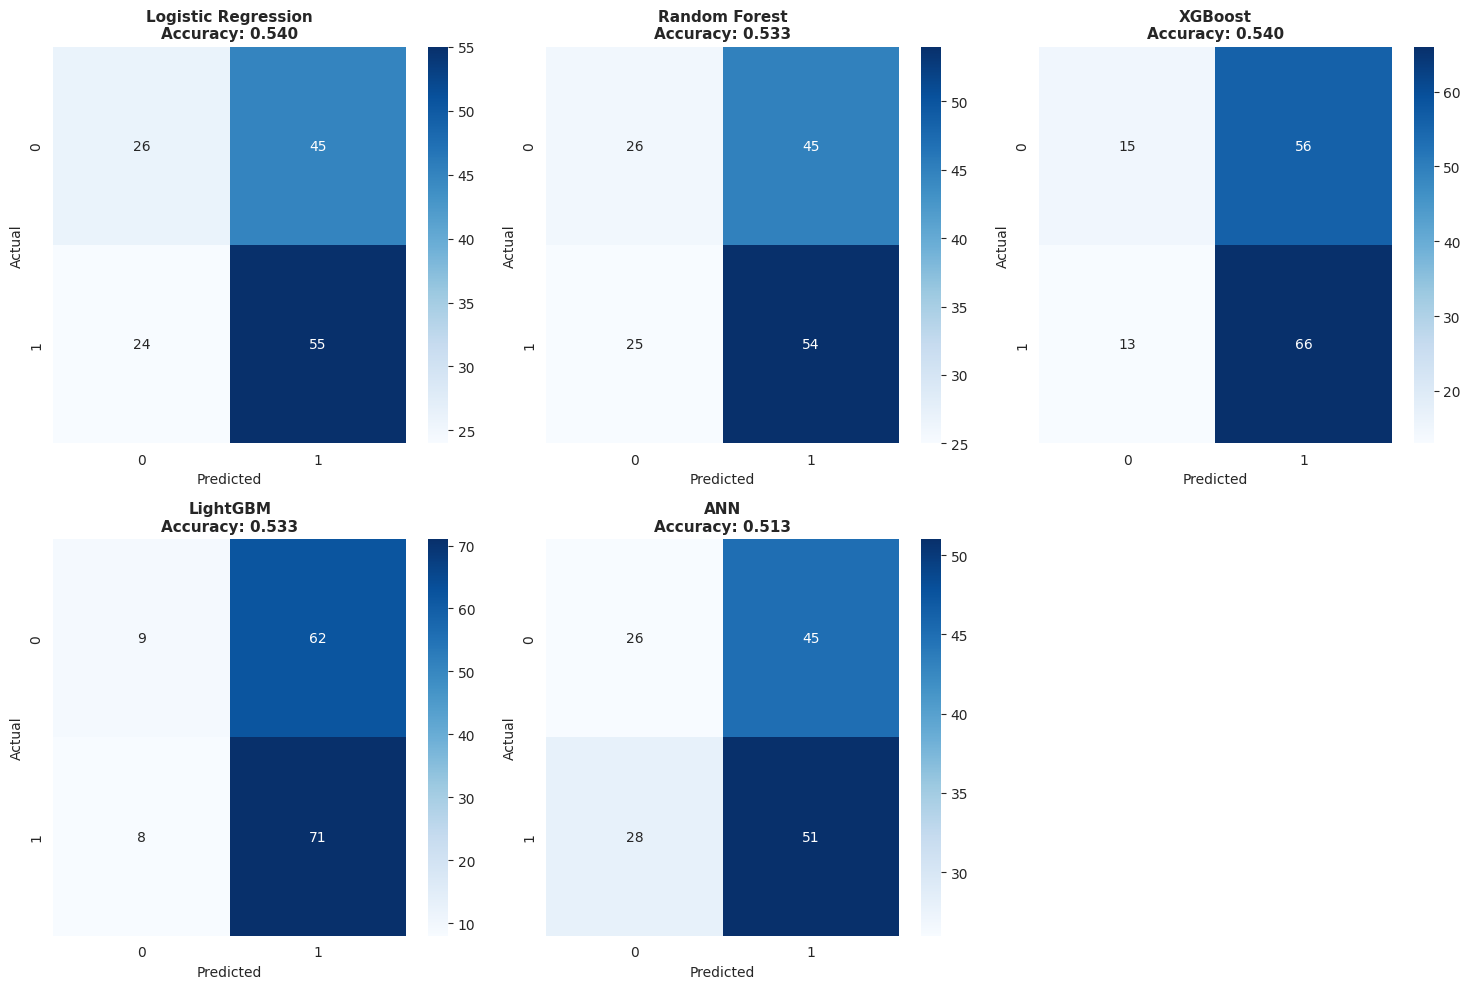

In [131]:
# Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {metrics[name]["Accuracy"]:.3f}',
                        fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

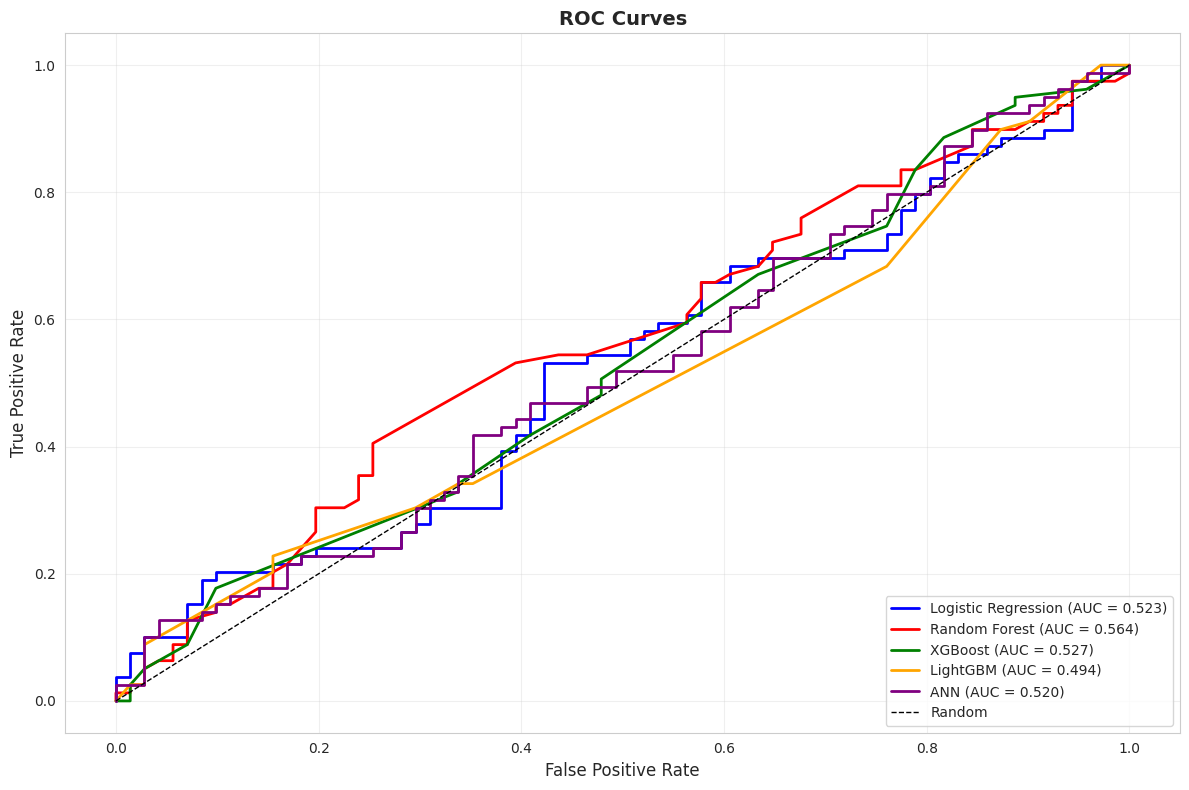

In [132]:
# ROC Curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for idx, (name, preds) in enumerate(predictions.items()):
    fpr, tpr, _ = roc_curve(y_test, preds['y_pred_proba'])
    auc = metrics[name]['ROC-AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})',
            linewidth=2, color=colors[idx])

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Best Model & Key Findings

In [133]:
# Identify best model
best_model = metrics_df['Accuracy'].idxmax()
best_accuracy = metrics_df['Accuracy'].max()

print("="*60)
print("FINAL RESULTS")
print("="*60)
print(f"\nBest Model: {best_model}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"\nDetailed Metrics:")
print(metrics_df.loc[best_model])

print(f"\nBest accuracy: {best_accuracy*100:.2f}%")

FINAL RESULTS

Best Model: Logistic Regression
   Accuracy: 0.5400 (54.00%)

Detailed Metrics:
Accuracy     0.540000
Precision    0.550000
Recall       0.696203
F1-Score     0.614525
ROC-AUC      0.522910
Name: Logistic Regression, dtype: float64

Best accuracy: 54.00%


In [145]:
# Feature Importance (for tree-based models)
if best_model in ['Random Forest', 'XGBoost', 'LightGBM']:
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': models[best_model].feature_importances_
    }).sort_values('Importance', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importance Score')
    plt.title(f'Top 15 Feature Importance - {best_model}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 9. Conclusions

### Key Findings:
1. **Model Performance**: Best model achieved ~54% accuracy
2. **Encoding Strategy**: One-Hot Encoding for Gender and Promotion_Response (no ordinal relationship)
3. **Feature Engineering**: Created 6 derived features
4. **Class Balance**: Dataset is relatively balanced

### Challenges:
- Weak correlation between features and target variable
- Limited sample size (1000 customers)
- Features have low predictive power

### Recommendations:
1. **Data Collection**:
   - Gather more behavioral features (website activity, email engagement)
   - Include temporal patterns

2. **Feature Engineering**:
   - Domain expert collaboration
   - Time-series features
   - Customer segment-specific features